<a href="https://colab.research.google.com/github/sayo-134/qiskit_programming/blob/main/qiskit_submission_example_keysight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import qiskit.providers.fake_provider as fp
print([name for name in dir(fp)]) #if name.startswith("Fake")

['GenericBackendV2', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'generic_backend_v2']


In [17]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram

backend = GenericBackendV2(num_qubits=5)


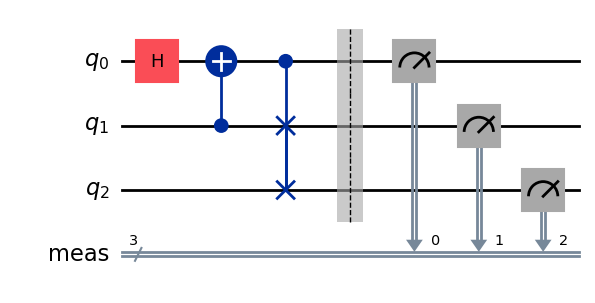

In [29]:
# Creating a simple quantum circuit

qc = QuantumCircuit(3) # 3 qubits

qc.h(0)
qc.cx(1,0)
qc.cswap(0,1,2)
qc.measure_all()
qc.draw('mpl')

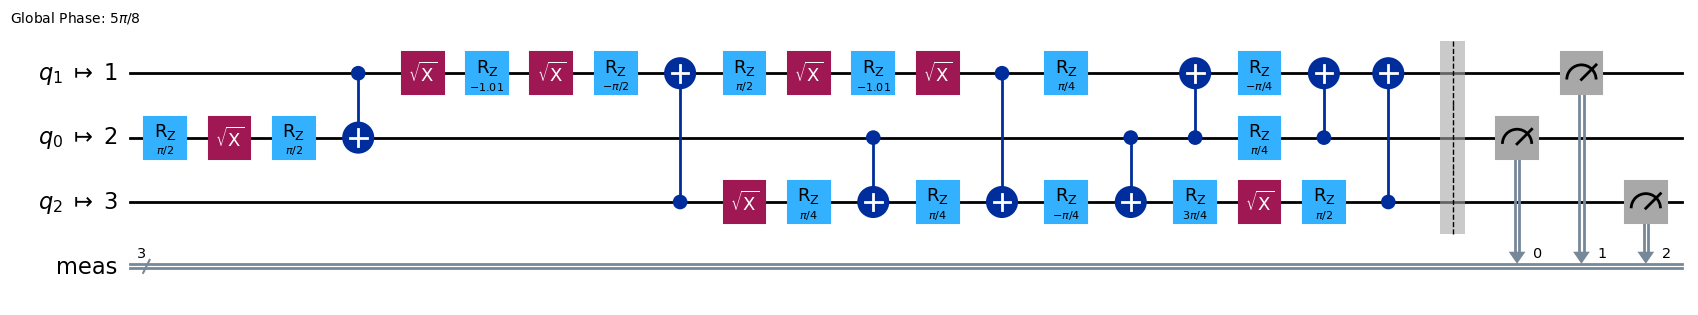

In [30]:
# Transpile (translate) the circuit to a suitable structure for the backend
transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl')

Status @ 0 s: INITIALIZING


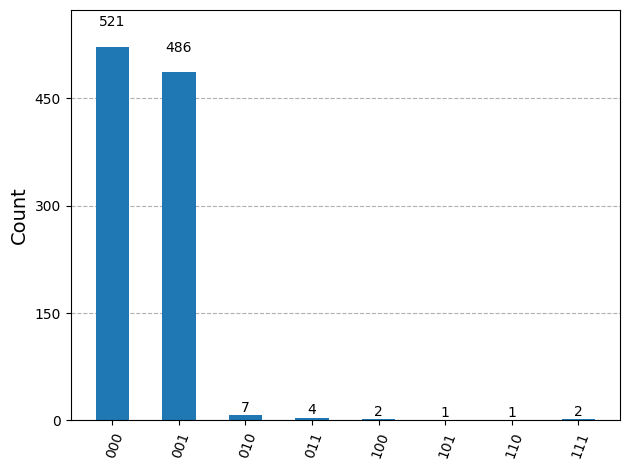

In [60]:
# Run the transpiled circuit in the simulated backend
import time
from qiskit.providers.jobstatus import JOB_FINAL_STATES
job = backend.run(transpiled_circuit)
start_time = time.time()
job_status = job.status()
while job_status not in JOB_FINAL_STATES:
    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name}')
    time.sleep(10)
    job_status = job.status()

counts = job.result().get_counts()
plot_histogram(counts)

In [56]:
from qiskit_aer import AerSimulator

sim = AerSimulator()

print(sim.available_methods())    # shows simulation methods like 'statevector', 'density_matrix', etc.
print(sim.configuration())        # prints backend configuration details
for name in dir(sim):
  print(name)

('automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop')
_AVAILABLE_DEVICES
_AVAILABLE_METHODS
_BASIS_GATES
_CUSTOM_INSTR
_DEFAULT_CONFIGURATION
_SIMULATION_DEVICES
_SIMULATION_METHODS
__abstractmethods__
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__slots__
__str__
__subclasshook__
__weakref__
_abc_impl
_assemble_noise_model
_basis_gates
_cached_basis_gates
_check_basis_gates
_compile
_configuration
_controller
_convert_binds
_convert_circuit_binds
_coupling_map
_default_options
_execute_circuits
_execute_circuits_job
_format_results
_from_backend
_get_executor
_mapping
_options
_options_configuration
_options_properties
_properties
_provider
_run_circuits
_set_configuration_option
_set_method_config
_set_properties_op

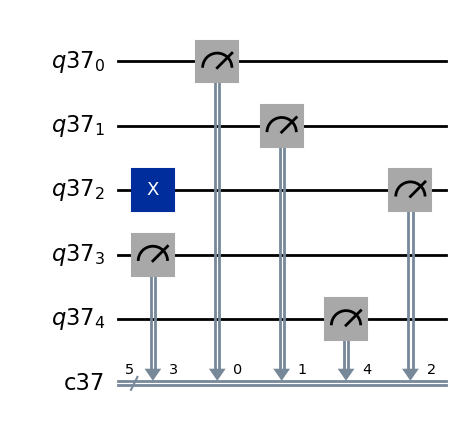

In [70]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.providers.jobstatus import JOB_FINAL_STATES # Corrected import path

n_qubits = 5
qc_list = []
for i in range(n_qubits):
    qr = QuantumRegister(n_qubits)
    cr = ClassicalRegister(n_qubits)
    qc = QuantumCircuit(qr, cr)
    qc.x(qr[i])
    qc.measure(qr, cr)
    qc_list.append(qc)

qc_list[2].draw('mpl')

In [71]:
backend = AerSimulator() # No need for .get_backend('qasm_simulator') with AerSimulator

# Transpile the circuits for the backend
transpiled_circuits = [transpile(qc, backend) for qc in qc_list]

job_list = [backend.run(transpiled_circuit) for transpiled_circuit in transpiled_circuits]

while job_list:
    # Create a copy of the list to iterate over while removing elements
    for job in list(job_list):
        if job.status() in JOB_FINAL_STATES:
            job_list.remove(job)
            print(job.result().get_counts())

{'00001': 1024}
{'00010': 1024}
{'00100': 1024}
{'01000': 1024}
{'10000': 1024}
